### 과제 : 
### DecisionTree Classifier 모델로  auto-mpg의
### 제조국 분류 모델 만들기 

##### 보고형식 : Tree 이미지, 하이퍼 파라미터 튜닝 내역,
##### 검증값, 테스트값, 비교 그래프( 튜닝 전*, 튜닝 후*)

In [1]:
## Tree model은 정규화 하지 말자~

import pandas as pd
import numpy as np

mpg=pd.read_csv('auto-mpg.csv')


In [2]:
mpg

,18.0,8,307.0,130.0,3504.,12.0,70,1,chevrolet chevelle malibu
0,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
1,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
2,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
3,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
4,15.0,8,429.0,198.0,4341.0,10.0,70,1,ford galaxie 500
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
394,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
395,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


In [3]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   18.0                       397 non-null    float64
 1   8                          397 non-null    int64  
 2   307.0                      397 non-null    float64
 3   130.0                      397 non-null    object 
 4   3504.                      397 non-null    float64
 5   12.0                       397 non-null    float64
 6   70                         397 non-null    int64  
 7   1                          397 non-null    int64  
 8   chevrolet chevelle malibu  397 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.0+ KB


In [4]:
mpg.describe()

,18.0,8,307.0,3504.,12.0,70,1
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,23.528463,5.448363,193.139798,2969.080605,15.577078,76.025189,1.574307
std,7.820926,1.698329,104.244898,847.485218,2.755326,3.689922,0.802549
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.000000,2223.000000,13.900000,73.000000,1.000000
50%,23.000000,4.000000,146.000000,2800.000000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3609.000000,17.200000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [5]:
mpg.columns = ['연비','실린더 수','배기량','출력','차중',
              '가속능력','출시년도','제조국','모델명']

In [6]:
mpg.describe()

,연비,실린더 수,배기량,차중,가속능력,출시년도,제조국
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,23.528463,5.448363,193.139798,2969.080605,15.577078,76.025189,1.574307
std,7.820926,1.698329,104.244898,847.485218,2.755326,3.689922,0.802549
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.000000,2223.000000,13.900000,73.000000,1.000000
50%,23.000000,4.000000,146.000000,2800.000000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3609.000000,17.200000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [7]:
(mpg['출력'] == '?').sum()

6

In [8]:
mpg.replace('?',np.nan,inplace=True)

In [9]:
(mpg == '?').sum()

연비       0
실린더 수    0
배기량      0
출력       0
차중       0
가속능력     0
출시년도     0
제조국      0
모델명      0
dtype: int64

In [10]:
mpg['출력'] = mpg['출력'].astype(float)
mpg['출력'].fillna(mpg['출력'].mean(), inplace=True)

In [11]:
mpg.drop(columns=['모델명'],inplace=True)

In [12]:
# 제조국은 1,2,3 의 범주형 데이터로 구성

import pandas as pd
pd.unique(mpg["제조국"])

array([1, 3, 2], dtype=int64)

In [13]:
data=mpg[['연비','실린더 수','배기량','출력','차중',
              '가속능력','출시년도']].values
target=mpg['제조국'].values

In [14]:
data

array([[  15. ,    8. ,  350. , ..., 3693. ,   11.5,   70. ],
       [  18. ,    8. ,  318. , ..., 3436. ,   11. ,   70. ],
       [  16. ,    8. ,  304. , ..., 3433. ,   12. ,   70. ],
       ...,
       [  32. ,    4. ,  135. , ..., 2295. ,   11.6,   82. ],
       [  28. ,    4. ,  120. , ..., 2625. ,   18.6,   82. ],
       [  31. ,    4. ,  119. , ..., 2720. ,   19.4,   82. ]])

In [15]:
target

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 2, 2, 2, 2,
       2, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 2, 2, 3, 3, 2, 1, 3, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 3, 1, 1, 1, 1, 2, 2, 2, 2, 1, 3, 3, 1, 3, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 3, 1, 3,
       3, 1, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 3, 1, 1, 1, 1, 1, 3, 1, 3, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 3, 3, 1, 2, 2, 3, 3, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 2, 3, 1, 2, 1,
       2, 2, 2, 2, 3, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3,
       1, 1, 1, 1, 2, 3, 3, 1, 2, 1, 2, 3, 2, 1, 1, 1, 1, 3, 1, 2, 1, 3,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 3, 1, 1, 1, 3, 2, 3, 2,
       3, 2, 1, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 3, 3, 1, 3, 1, 1, 3, 2, 2, 2, 2, 2, 3, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 3, 1, 1, 2, 1, 2, 1, 1,

In [16]:
# Test_split
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    data, target, test_size=0.2, random_state=42)

In [17]:
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier(random_state=42)
dt.fit(train_input,train_target)
print(dt.score(train_input,train_target))
print(dt.score(test_input,test_target))

1.0
0.8125


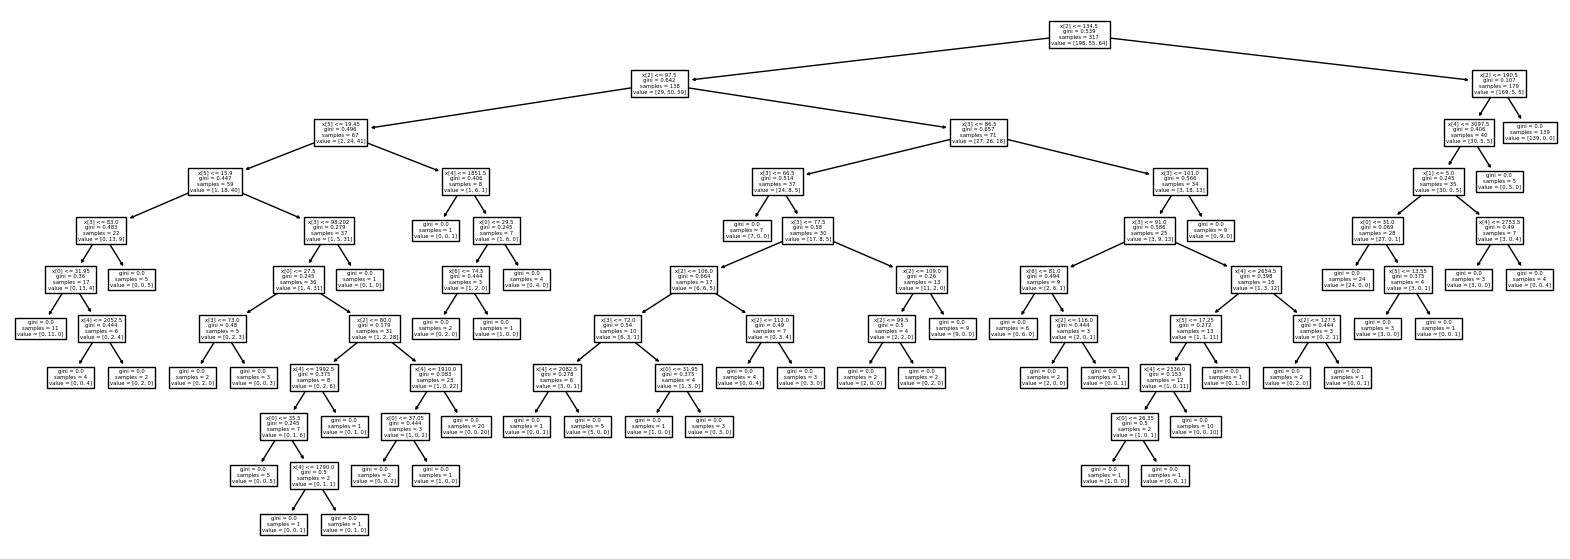

In [18]:
# 모델 시각화
import matplotlib.pylab as plt  
from sklearn.tree import plot_tree

plt.figure(figsize=(20,7))
plot_tree(dt)
plt.show()

### max_depth=1 로 제한

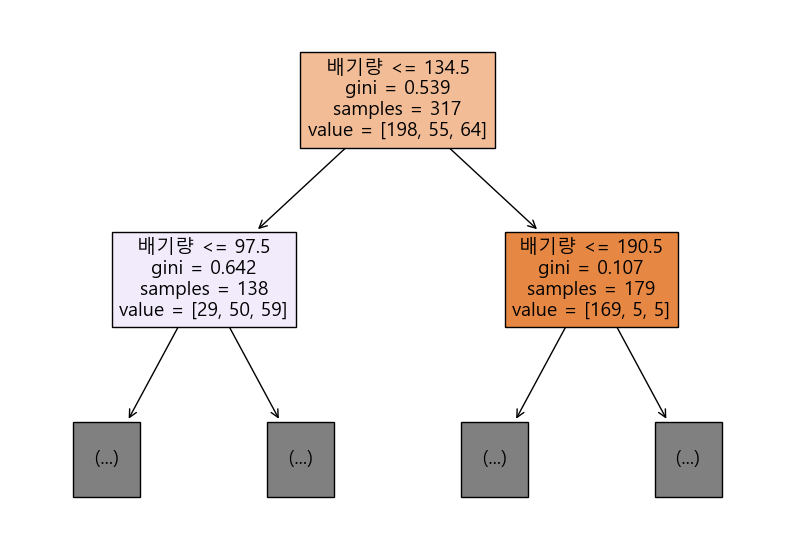

In [19]:
import matplotlib.font_manager as fm

font_path = 'C:/Windows/Fonts/malgun.ttf'  # 폰트 경로
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)

plt.figure(figsize=(10,7))
plot_tree(dt,max_depth=1,filled=True,feature_names=['연비','실린더 수','배기량','출력','차중',
              '가속능력','출시년도'])
plt.show()

### max_depth = 3

In [20]:
# max_depth = 3 으로 모델 학습
dt=DecisionTreeClassifier(max_depth=3,random_state=42)
dt.fit(train_input,train_target)
print(dt.score(train_input,train_target))
print(dt.score(test_input,test_target))

0.8264984227129337
0.7375


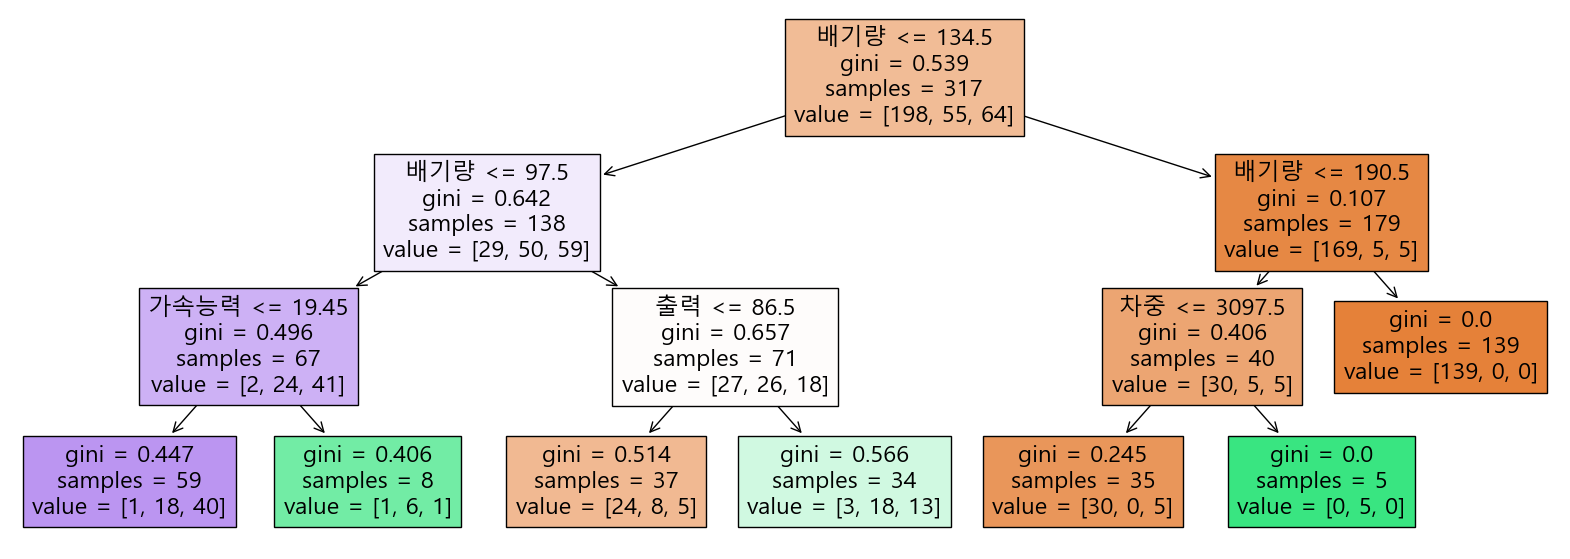

In [21]:
plt.figure(figsize=(20,7))
plot_tree(dt,filled=True,feature_names=['연비','실린더 수','배기량','출력','차중',
              '가속능력','출시년도'])
plt.show()


In [22]:
dt=DecisionTreeClassifier(max_depth=3,random_state=42)
dt.fit(train_input,train_target)
print(dt.score(train_input,train_target))
print(dt.score(test_input,test_target))

0.8264984227129337
0.7375


In [23]:
print(dt.feature_importances_)

[0.         0.         0.79138372 0.08882288 0.08133415 0.03845925
 0.        ]


In [24]:
dt=DecisionTreeClassifier(min_impurity_decrease=0.0005,random_state=42)
dt.fit(train_input,train_target)
print(dt.score(train_input,train_target))
print(dt.score(test_input,test_target))

1.0
0.8125


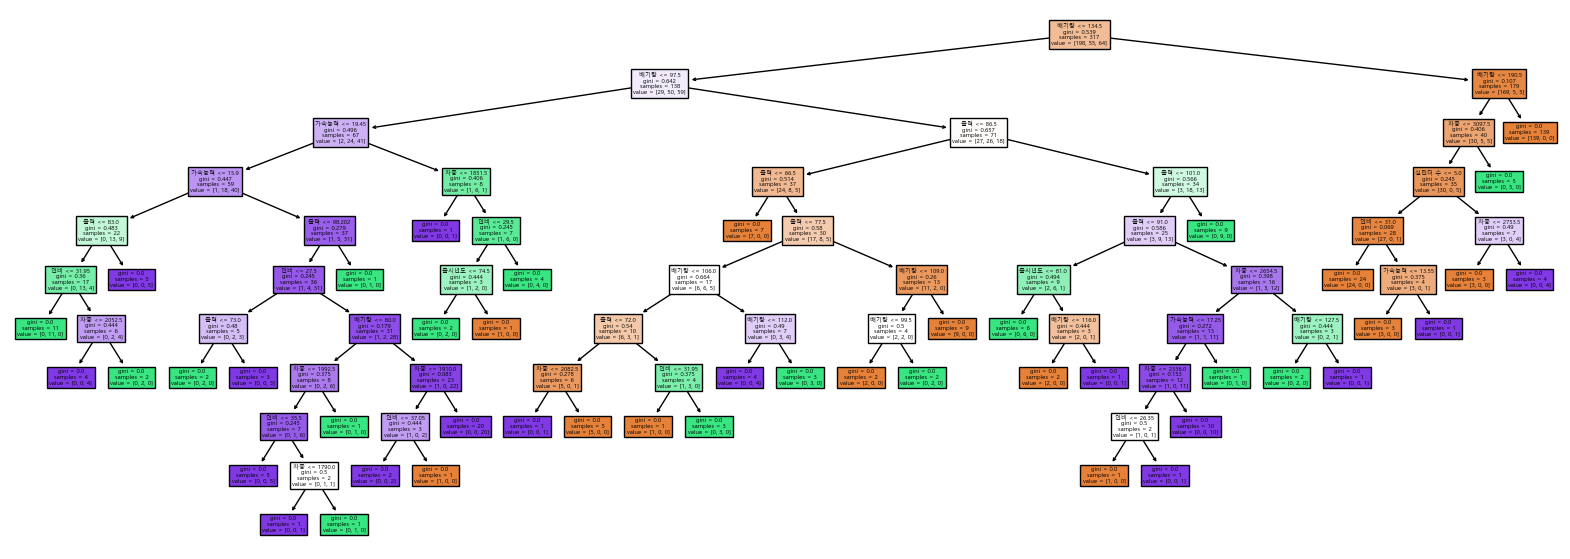

In [25]:
plt.figure(figsize=(20,7))
plot_tree(dt,filled=True,feature_names=['연비','실린더 수','배기량','출력','차중',
              '가속능력','출시년도'])
plt.show()

In [26]:
# 불순도 10배수
dt=DecisionTreeClassifier(min_impurity_decrease=0.005,random_state=42)
dt.fit(train_input,train_target)
print(dt.score(train_input,train_target))
print(dt.score(test_input,test_target))

0.9463722397476341
0.8375


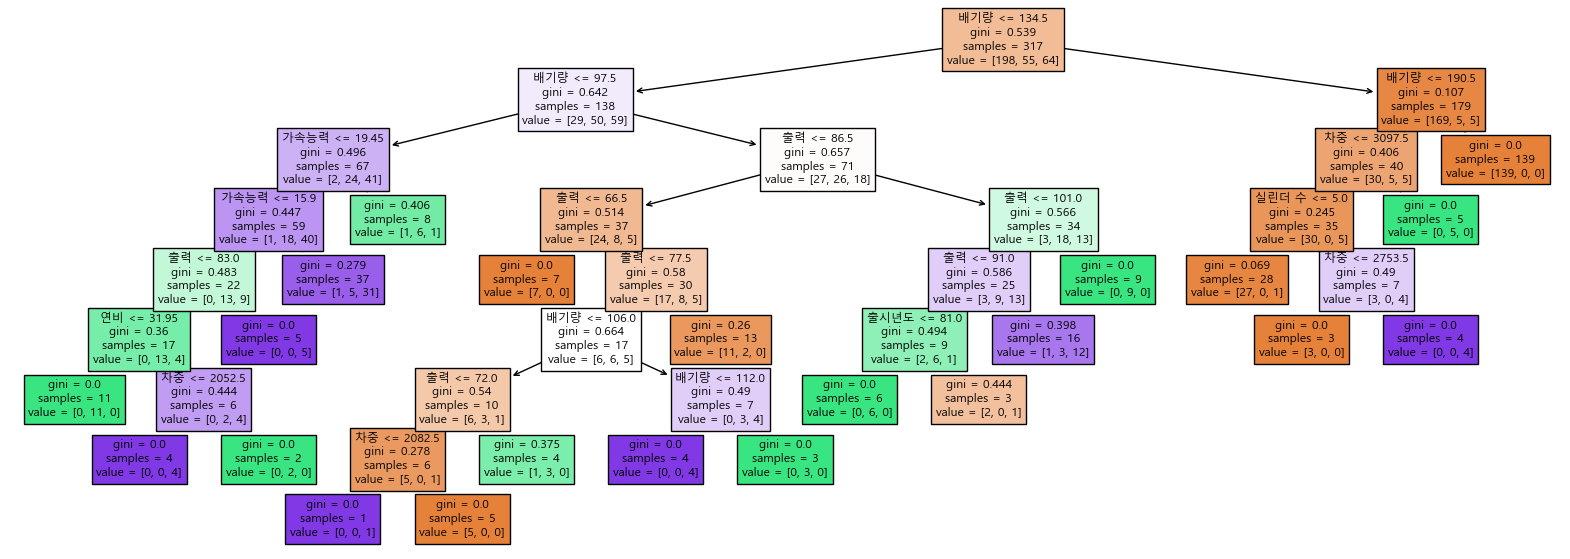

In [27]:
plt.figure(figsize=(20,7))
plot_tree(dt,filled=True,feature_names=['연비','실린더 수','배기량','출력','차중',
              '가속능력','출시년도'])
plt.show()

In [28]:
impurity_list=[0.000005,0.00005,0.0005,0.005,0.05]

train_score=[]
test_score=[]

In [29]:
for i in impurity_list:
    dt=DecisionTreeClassifier(min_impurity_decrease=i,random_state=42)
    dt.fit(train_input,train_target)
    
    train_point=dt.score(train_input,train_target)
    test_point=dt.score(test_input,test_target)
    
    train_score.append(train_point)
    test_score.append(test_point)

In [30]:
train_score

[1.0, 1.0, 1.0, 0.9463722397476341, 0.7192429022082019]

Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], 

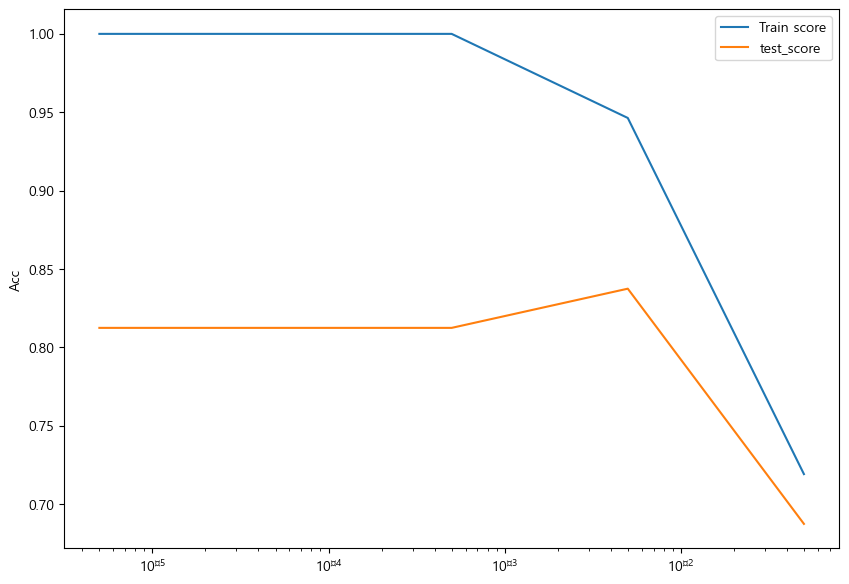

In [31]:
from cProfile import label
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = True

font_path = 'C:/Windows/Fonts/malgun.ttf'  # 폰트 경로
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)

plt.figure(figsize=(10, 7))
plt.plot(impurity_list,train_score,label="Train score")
plt.plot(impurity_list,test_score,label="test_score")
plt.xscale('log')
plt.ylabel("Acc")
plt.legend()
plt.show()

## 검증셋 분할

In [32]:
sub_input, val_input, sub_target, val_target = train_test_split(
    train_input,train_target,test_size=0.2,random_state=42)

In [33]:
print(sub_input.shape,val_input.shape,test_input.shape)

(253, 7) (64, 7) (80, 7)


In [34]:
from sklearn.tree import DecisionTreeClassifier

# 모델학습
dt=DecisionTreeClassifier(random_state=42)
dt.fit(sub_input,sub_target)   

# 훈련점수, 검증점수
print(dt.score(sub_input,sub_target))  
print(dt.score(val_input,val_target))

1.0
0.78125


In [35]:
from sklearn.model_selection import cross_validate

dt=DecisionTreeClassifier(random_state=42)
scores=cross_validate(dt,train_input,train_target)
print(scores)

{'fit_time': array([0.        , 0.        , 0.        , 0.        , 0.00800157]), 'score_time': array([0.        , 0.00800395, 0.        , 0.        , 0.        ]), 'test_score': array([0.84375   , 0.796875  , 0.84126984, 0.80952381, 0.73015873])}


In [36]:
import numpy as np
print(np.mean(scores['test_score']))

0.8043154761904763


In [37]:
# cross_validate 분류의 샘플링 편향 방지를 위한 stratified K-fold 이용
from sklearn.model_selection import StratifiedKFold

scores = cross_validate(dt,train_input,train_target,cv=StratifiedKFold())

print(np.mean(scores['test_score']))

0.8043154761904763


In [38]:
# cv 핸들링
splitter = StratifiedKFold(n_splits=10,shuffle=True,random_state=42)
scores=cross_validate(dt,train_input,train_target,cv=splitter)
print(np.mean(scores['test_score']))

0.8204637096774194


## 그리드 서치

In [39]:
# min_impurity_decrease 튜닝

from sklearn.model_selection import GridSearchCV

params={
    'min_impurity_decrease': [0.0001,0.0002,0.0003,0.0004,0.0005]
}

In [40]:
gs=GridSearchCV(DecisionTreeClassifier(random_state=42),params,n_jobs=-1)
gs.fit(train_input,train_target)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'min_impurity_decrease': [0.0001, 0.0002, 0.0003,
                                                   0.0004, 0.0005]})

In [41]:
print(gs.best_params_)

{'min_impurity_decrease': 0.0001}


In [42]:
dt=gs.best_estimator_
print(dt.score(train_input,train_target))
print(dt.score(test_input,test_target))

1.0
0.8125


In [43]:
gs.cv_results_

{'mean_fit_time': array([0.00325646, 0.00322008, 0.        , 0.00317144, 0.00555267]),
 'std_fit_time': array([0.0041199 , 0.00394383, 0.        , 0.0038933 , 0.00420992]),
 'mean_score_time': array([0.       , 0.       , 0.       , 0.0017735, 0.       ]),
 'std_score_time': array([0.      , 0.      , 0.      , 0.003547, 0.      ]),
 'param_min_impurity_decrease': masked_array(data=[0.0001, 0.0002, 0.0003, 0.0004, 0.0005],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'min_impurity_decrease': 0.0001},
  {'min_impurity_decrease': 0.0002},
  {'min_impurity_decrease': 0.0003},
  {'min_impurity_decrease': 0.0004},
  {'min_impurity_decrease': 0.0005}],
 'split0_test_score': array([0.84375, 0.84375, 0.84375, 0.84375, 0.84375]),
 'split1_test_score': array([0.796875, 0.796875, 0.796875, 0.796875, 0.796875]),
 'split2_test_score': array([0.84126984, 0.84126984, 0.84126984, 0.84126984, 0.84126984]),
 'split3_test_score':

In [44]:
print(gs.cv_results_['mean_test_score'])

[0.80431548 0.80431548 0.80431548 0.80431548 0.80431548]


In [45]:
best_index=np.argmax(gs.cv_results_['mean_test_score'])
print(gs.cv_results_['params'][best_index])

{'min_impurity_decrease': 0.0001}


In [46]:
params={# min_impurity_decrease : 정보이득 기준
        # max_depth :  가지 조건 기준
        # min_samples_spli : 최소 샘플
    'min_impurity_decrease':np.arange(0.0001,0.001,0.0001), # 실수형 지정(np.arange)
    'max_depth':range(5,20,1), # 정수형 지정(range)
    'min_samples_split': range(2,100,10)
}

In [47]:
gs=GridSearchCV(DecisionTreeClassifier(random_state=42),params,n_jobs=-1)
gs.fit(train_input,train_target)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(5, 20),
                         'min_impurity_decrease': array([0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008,
       0.0009]),
                         'min_samples_split': range(2, 100, 10)})

In [48]:
print(gs.best_params_)

{'max_depth': 6, 'min_impurity_decrease': 0.0001, 'min_samples_split': 2}


In [49]:
print(np.max(gs.cv_results_['mean_test_score']))

0.8168650793650795


## 랜덤 서치

In [50]:
from scipy.stats import uniform, randint

rgen = randint(0,10)
rgen.rvs(10)


array([3, 9, 4, 7, 4, 0, 8, 3, 7, 0], dtype=int64)

In [51]:
np.unique(rgen.rvs(1000),return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64),
 array([102,  92,  89, 101, 112, 118, 116,  88,  95,  87], dtype=int64))

In [52]:
ugen=uniform(0,1)
ugen.rvs(10)

array([0.70117758, 0.40235422, 0.88977381, 0.05345069, 0.41098112,
       0.4263139 , 0.68919955, 0.78887144, 0.98938565, 0.18465442])

In [53]:
# 확률분포 기반의 파라미터 범위 지정
params={
    'min_impurity_decrease':uniform(0.0001,0.001), # 실수
    'max_depth': randint(20,50), # 정수
    'min_samples_split': randint(2,25),
    'min_samples_leaf': randint(1,25)
}

In [54]:
# 랜덤서치
from sklearn.model_selection import RandomizedSearchCV

# n_iter = 100
rs=RandomizedSearchCV(DecisionTreeClassifier(random_state=42),params,
                      n_iter=100, n_jobs=-1,random_state=42)
rs.fit(train_input,train_target)

RandomizedSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001F346412050>,
                                        'min_impurity_decrease': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001F346440610>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001F3466F8C10>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001F346413B90>},
                   random_state=42)

In [55]:
print(rs.best_params_)

{'max_depth': 43, 'min_impurity_decrease': 0.0005703006344460385, 'min_samples_leaf': 2, 'min_samples_split': 7}


In [56]:
dt=rs.best_estimator_
print(dt.score(test_input,test_target))

0.8375
